# Линейная регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Обучите модель линейной регрессии оценивать  вес человека. Для начала постройте одномерную модель, где в качестве единственного признака будет только вес, который человек сообщил о себе сам. Для обучения линейной модели используейте класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
from sklearn.linear_model import LinearRegression

## Пункт 1

Для начала визуализируем данные для удобства

Text(0, 0.5, 'weight, кг')

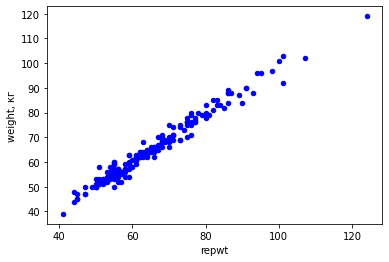

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error as MSE



ax = ds.plot.scatter(x = 'repwt', y = 'weight', color = "b")
ax.set_label('repwt, кг')
ax.set_ylabel('weight, кг')

In [5]:
sex_map = {'M':1, 'F':0}
ds['sex'] = ds['sex'].map(sex_map)

Почистим датасет

In [6]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
ds = clean_dataset(ds)
ds.head()

,sex,weight,height,repwt,repht
1,1.0,77.0,182.0,77.0,180.0
2,0.0,58.0,161.0,51.0,159.0
3,0.0,53.0,161.0,54.0,158.0
4,1.0,68.0,177.0,70.0,175.0
5,0.0,59.0,157.0,59.0,155.0


В качестве признака будем рассматривать сообщённый вес, а в качестве целевой переменной --- реальный вес человека

In [7]:
features = ds['repwt']
labels = ds['weight']
features.head()

1    77.0
2    51.0
3    54.0
4    70.0
5    59.0
Name: repwt, dtype: float64

Разделим выборку на тренировочную и тестовую

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state = 42)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Создадим модель линейной регрессии с одним признаком

In [10]:
simple_linreg = LinearRegression()

In [11]:
simple_linreg.fit(X_train, y_train)

LinearRegression()

Отобразим на графике полученную в ходе обучения прямую

Text(0, 0.5, 'реальный вес, см')

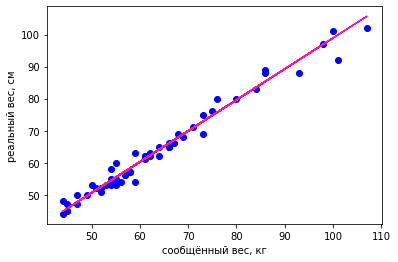

In [12]:
ax = plt.scatter(x = X_test, y = y_test, color = "b")
plt.plot(X_test, simple_linreg.coef_[0][0]*X_test + simple_linreg.intercept_[0], color = 'deeppink')
plt.xlabel('сообщённый вес, кг')
plt.ylabel('реальный вес, см')

Для оценки точности посчитаем среднюю квадратичную ошибку

In [13]:
y_preds = simple_linreg.predict(X_test)
accuracy = MSE(y_test, y_preds)
print(accuracy)

5.408628304868994


## Пункт 2

Добавим признак "пол" и обучим новую модель, у которой будет два признака

In [14]:
features = ds.drop(columns=['repht', 'height', 'weight'])
labels = ds['weight']
features.head()

,sex,repwt
1,1.0,77.0
2,0.0,51.0
3,0.0,54.0
4,1.0,70.0
5,0.0,59.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42)

In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [22]:
w1, w2 = linreg.coef_

          sex      repwt
20  -0.000000  60.756948
43  -0.000000  58.764917
167 -0.000000  61.752964
84  -0.000000  54.780855
157 -1.078096  67.729057
..        ...        ...
81  -0.000000  59.760933
160 -0.000000  55.776870
12  -0.000000  55.776870
7   -1.078096  76.693197
28  -0.000000  59.760933

[73 rows x 2 columns]


Отобразим получившуюся прямую на графике

In [18]:
X = np.array(X_test['repwt'])
w = np.linspace(X.min(), X.max())

Text(0, 0.5, 'реальный вес, см')

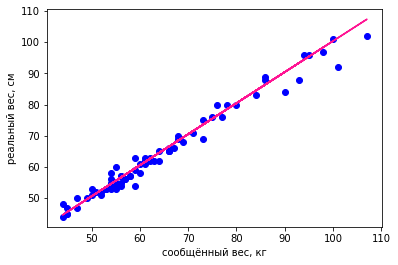

In [25]:
ax = plt.scatter(x = X, y = y_test, color = "b")
plt.plot(X, w2*X + linreg.intercept_, color = 'deeppink')
plt.xlabel('сообщённый вес, кг')
plt.ylabel('реальный вес, см')

Посчитаем среднюю квадратичную ошибку(MSE)

In [26]:
y_preds = linreg.predict(X_test)
accuracy2 = MSE(y_test, y_preds)
print(accuracy2)

5.220341640494578


## Вывод

В ходе работы я построил 2 линейные регрессионные модели. Первая по значению веса, который человек сообщил о себе, прогнозирует его реальный вес. Среднее квадратичное отклонение модели составило 5.408628304868994, затем я добавил ещё один признак --- пол человека. Среднее квадратичное отклонение новой модели составило 5.220341640494578, то есть она прогнозирует реальный вес человека более точно